# Model 1 - Logistic Regression

In [29]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
    
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
pd.set_option('display.max_columns',None)

In [31]:
#Load data
data = pd.read_excel(r"C:\Users\lohit\Documents\Mod 1\hcc\Leadership model - Worksheet.xlsx") #Read excel
data.head() #Display first 5 rows

,Manager SID,Average (Act with Humility),Average (Act with Humility) - Score,Average (Lead with Transparency),Average (Lead with Transparency) - Score,Average (Deliver with Focus),Average (Deliver with Focus) - Score,Face-to-face conversation?,Face-to-face conversation - Score,Electronic mail (email)?,Electronic mail (email) - Score,Phone call (two-way audio)?,Phone call (two-way audio)-Score,Messaging (two-way text)?,Messaging (two-way text) - Score,Video conference (two-way audio/video)?,Video conference (two-way audio/video) - Score,Leadership Glint Average,Leadership Glint Average - Score,Innovation Average,Innovation Average - Score,Voluntary Turnover,Involuntary Turnover,Attrition score,Corporate band change,Promotions,Promotions score,Average Number of Checkpoints,Average Checkpoints - Score,What is the number of direct reports that share your physical location?,What is the number of direct reports that do not share your physical location?,Total reportees(past 2 years),Effective Leadership
0,125382,4.000,1,4.000000,1,3.111111,0,Less than once per month,0,Once a day,3,Once or twice a month,1,Once or twice a month,1,Once or twice a week,2,0.000000,0,2.0,0,0,0,1,NaN,NaN,0,0.666667,0,0,3,3,0
1,110184,3.375,0,3.428571,0,3.111111,0,Less than once per month,0,More than once a day,4,Once or twice a week,2,Once a day,3,Once or twice a week,2,4.456111,1,4.2,1,0,2,0,2.0,2.0,1,0.750000,0,1,4,7,0
2,129969,4.000,1,3.714286,0,4.000000,1,Once a day,3,More than once a day,4,More than once a day,4,More than once a day,4,More than once a day,4,4.499621,1,4.8,1,3,0,0,NaN,1.0,1,1.000000,0,3,0,6,1
3,113249,3.750,0,3.000000,0,3.555556,0,Less than once per month,0,Once a day,3,Once or twice a week,2,Once or twice a week,2,Once a day,3,4.379304,1,4.0,1,0,2,1,2.0,3.0,1,1.800000,0,11,13,26,0
4,115141,4.375,1,4.142857,1,4.222222,1,Once or twice a month,1,More than once a day,4,Once or twice a week,2,Once or twice a week,2,Once or twice a month,1,3.736111,0,3.8,1,1,1,0,1.0,1.0,1,2.555556,1,0,9,11,1


In [32]:
target = data['Effective Leadership']
features = data[['Average (Act with Humility) - Score','Average (Lead with Transparency) - Score','Average (Deliver with Focus) - Score','Leadership Glint Average - Score','Innovation Average - Score','Attrition score','Promotions score','Average Checkpoints - Score']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=21, shuffle=True)

In [34]:
#Train a regularized logistic regression model using grid search - Because it is a small dataset, sensitivity is
#high therefore, grid search is useful. Cross validation is done in grid search. 

#Define model parameters to search over
params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,250,500,750,1000],'penalty':['l1','l2']}

#Define model
model = LogisticRegression(solver='liblinear')

#Define gridsearch - how many CVs (10) and what your scoring method will be (AUC) 
clf = GridSearchCV(model,params, cv=10,scoring='roc_auc')

#Run the gridsearch
clf.fit(X_train,y_train)

#Print results
clf.cv_results_

{'mean_fit_time': array([0.00388854, 0.00491631, 0.00181711, 0.00222099, 0.0022999 ,
        0.00249953, 0.00179958, 0.00249329, 0.00406959, 0.00246418,
        0.00489402, 0.00220118, 0.00513492, 0.00321896, 0.00558164,
        0.00279865, 0.00591986, 0.00260866, 0.00628762, 0.00354452,
        0.00723603, 0.00454266]),
 'std_fit_time': array([0.00353911, 0.0058227 , 0.00041094, 0.00128151, 0.00167775,
        0.00111757, 0.00039977, 0.00119067, 0.00185707, 0.00102657,
        0.00233079, 0.00041516, 0.00140856, 0.00110779, 0.00154855,
        0.00132328, 0.00222437, 0.00125894, 0.00214991, 0.00133033,
        0.00230407, 0.00122346]),
 'mean_score_time': array([0.00490005, 0.0030097 , 0.00159767, 0.00229826, 0.00231237,
        0.00240848, 0.00192378, 0.0025111 , 0.00315545, 0.0024977 ,
        0.00242455, 0.00189857, 0.00278447, 0.00304692, 0.00300555,
        0.00289183, 0.00301154, 0.00250914, 0.00305336, 0.00290549,
        0.00320239, 0.0038132 ]),
 'std_score_time': array([0.00

In [35]:
#Pick the best model
print(clf.best_estimator_) 

#Print results
print(np.mean(clf.cv_results_['mean_test_score'])) #mean CV AUC
print(np.min(clf.cv_results_['mean_test_score'])) #min CV AUC
print(np.max(clf.cv_results_['mean_test_score'])) #max CV AUC

LogisticRegression(C=1, penalty='l1', solver='liblinear')
0.9094290948702713
0.5
1.0


In [36]:
#Use the best model to make predictions
preds = clf.best_estimator_.predict_proba(X_test).T[1]

In [37]:
fprLR, tprLR, threshLR = roc_curve(y_test, preds)
roc_auc_LR= roc_auc_score(y_test, preds)

#Round the output using a threshold corresponding to a TPR of 0.8
yhatLRround = []
LRthresh = threshLR[next(x[0] for x in enumerate(tprLR) if x[1] > 0.8)]
for i in preds:
    if i > LRthresh:
        yhatLRround.append(1)
    else:
        yhatLRround.append(0)
                           
#yhatLRround is the predicted leadership effectiveness. We can feed in new test dataset and do the same. 

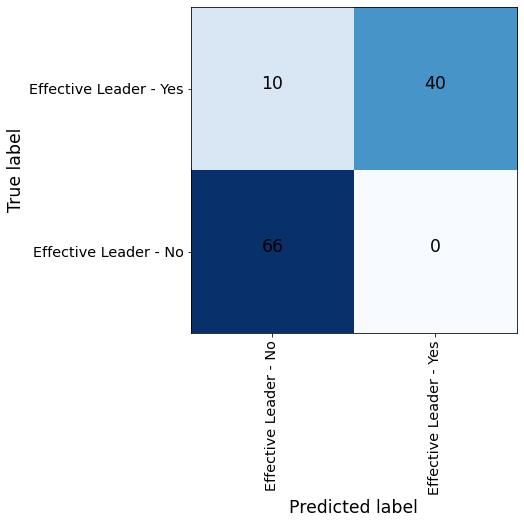

In [38]:
#Create a confusion matrix
cMatrix = confusion_matrix(y_true = y_test , y_pred = yhatLRround )
fig = figure(figsize=(10, 6))
plt.imshow(cMatrix, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
plt.ylim([-0.5,1.5])
labels = ['Effective Leader - No', 'Effective Leader - Yes']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

# Model 2 - Random Forest Classifier

In [39]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from IPython.display import Image
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#Define the model
RFmod = RandomForestClassifier(random_state=0)

#Choose some hyperparameter values 
RFparams={'n_estimators':randint(10,250),'max_features':['auto',None],
          'max_depth':randint(1,10),'min_samples_leaf':randint(1,10),
          'class_weight':[None,'balanced']}

In [41]:
#Run the random search
clfRF = RandomizedSearchCV(RFmod,RFparams,#model and parameters
                             cv=10,#number of cross validation folds
                             scoring='roc_auc',#accuracy metric
                             n_iter=1)#number of random parameter combinations
clfRF.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016C0DAEE640>,
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016C0DA23880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016C0DA13C10>},
                   scoring='roc_auc')

In [42]:
#Look at the parameters for the best model
clfRF.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=None,
                       min_samples_leaf=7, n_estimators=229, random_state=0)

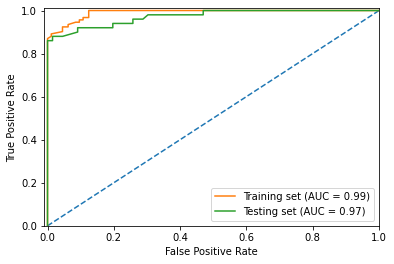

In [43]:
# Compute the training and testing set ROC curves

clfpreds_train = clfRF.best_estimator_.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, clfpreds_train)
roc_auc_train= roc_auc_score(y_train, clfpreds_train)

clfpreds_test = clfRF.best_estimator_.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, clfpreds_test)
roc_auc_test= roc_auc_score(y_test, clfpreds_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.2f)' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [ ]:
print(clfpreds_test)

In [18]:
predicted_rf = clfRF.best_estimator_.predict(X_test)


In [20]:
df2 = pd.DataFrame(X_test)

In [21]:
df2['predicted_rf'] = predicted_rf

In [26]:
df2['Actual_rf'] = y_test

In [27]:
df2  #the dataframe with test data set's predicted rf_leadership effectiveness

,Average (Act with Humility) - Score,Average (Lead with Transparency) - Score,Average (Deliver with Focus) - Score,Leadership Glint Average - Score,Innovation Average - Score,Attrition score,Promotions score,Average Checkpoints - Score,predicted_rf,Actual_rf
20,0,0,0,0,1,1,0,0,0,0
89,1,0,1,1,1,0,0,0,0,0
130,1,1,1,0,1,1,0,0,0,0
214,1,1,1,1,1,0,0,1,0,1
59,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44,1,1,1,1,1,0,1,0,0,1
136,0,0,0,0,0,0,0,0,0,0
53,0,0,0,1,0,0,1,0,0,0
102,1,0,1,0,1,1,0,1,0,0
